## Regularization 

<ul>
<li>A model will have a low accuracy if it is overfitting. </li>
<li>Overfitting occurs when model is trying too hard to capture the noise (samples that don't represent true pattern)
    in your training dataset.</li>
<li>When model is more flexible, it is prone to overfitting</li>
<li>Regularization shrinks the coefficients (parameter or slops) towards zero to discourages a more complex or flexible model, so as to avoid the risk of overfitting</li>
    <li>Ridge and Lasso are two options </li>
    <li>Regularization strength is provided by parameter <b>alpha</b></li>
</ul>    

In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
X_train = pd.DataFrame({'sqft':[1000,2000,3500,2455,1800,1550]})
y_train = pd.Series([40,65,100,80,50,55])
X_test = pd.DataFrame({'sqft':[2500,1000,3800,2200] })
y_test = pd.Series([65,50,80,60])

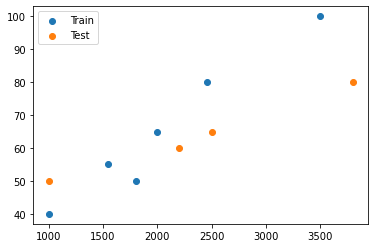

In [3]:
plt.scatter(X_train.sqft, y_train, label='Train')
plt.scatter(X_test.sqft, y_test, label = 'Test')
plt.legend()

### LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [34]:
lr_model.coef_

array([0.02492521])

In [7]:
y_pred = lr_model.predict(X_train)

In [8]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  18.540402526677706
RMSE     :  4.305856770339407
R2 Score :  0.9536489936833057


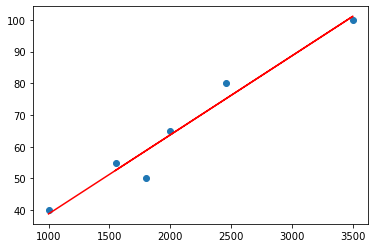

In [9]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred,'r-')

In [35]:
y_pred = lr_model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  286.119131689681
RMSE     :  16.915056360818934
R2 Score :  -1.4415499237519445


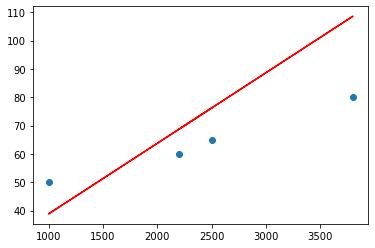

In [12]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred,'r-')

## Ridge Regression (L2)

In [13]:
from sklearn.linear_model import Ridge

In [39]:
ridge = Ridge(normalize=True, alpha=0.7)
ridge.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.7, normalize=True)

In [40]:
ridge.coef_

array([0.01466189])

In [41]:
y_pred = ridge.predict(X_train)

In [42]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  83.21694327474962
RMSE     :  9.122332118200347
R2 Score :  0.7919576418131259


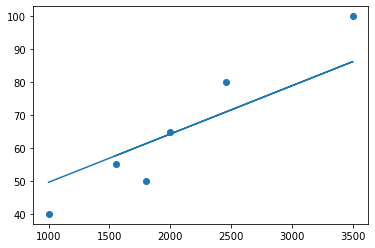

In [43]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [44]:
y_pred = ridge.predict(X_test)

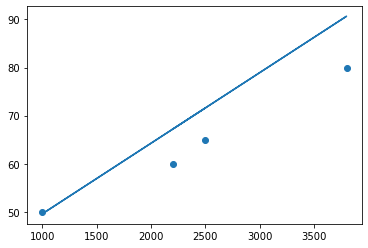

In [45]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [46]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  52.13236514959739
RMSE     :  7.2202745896258955
R2 Score :  0.5551371507234356


## LassoCV

In [22]:
from sklearn.linear_model import LassoCV

In [23]:
lasso = LassoCV(normalize = True, cv = 3, alphas = [.5,1, 2,4,6])
lasso.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(alphas=[0.5, 1, 2, 4, 6], cv=3, normalize=True)

In [48]:
lasso.coef_

array([0.02336221])

In [47]:
lasso.alpha_

0.5

In [49]:
y_pred = lasso.predict(X_train)

In [50]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  20.04040252667772
RMSE     :  4.476650815808367
R2 Score :  0.9498989936833057


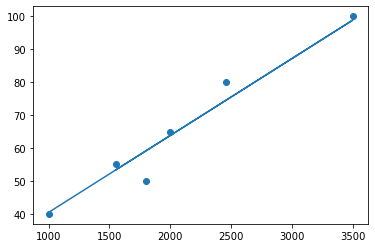

In [51]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [52]:
y_pred = lasso.predict(X_test)

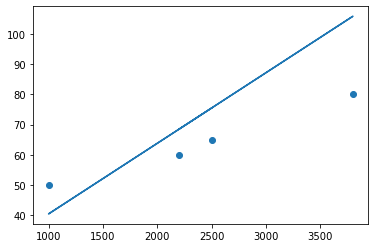

In [53]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [31]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  235.56807070118145
RMSE     :  15.348226956270274
R2 Score :  -1.0101808699834152
